## SHAP (SHapley Additive exPlanations) 原理及應用

**SHAP (SHapley Additive exPlanations)** 是一種強大的解釋方法，基於合作博弈論中的 Shapley 值，能幫助我們解釋機器學習模型對於單一預測的貢獻度。它的核心目標是透過計算不同特徵對預測結果的「貢獻值」，來揭示模型如何進行決策。

### 原理介紹

SHAP 方法的核心基礎來自於 Shapley 值理論，該理論來自博弈論中的合作賽局。Shapley 值用於分配收益，告訴我們在多個參與者共同完成一個任務後，應該如何公平分配每個參與者的貢獻。應用到機器學習中，這意味著我們可以為每個特徵分配一個「貢獻分數」，該分數反映了該特徵對模型預測結果的影響。

SHAP 值的計算過程通過對所有可能的特徵子集進行平均化貢獻來進行，這保證了結果的公平性。雖然這個過程在理論上非常完整，但實際上會比較耗費計算資源，因此有些近似算法被開發來加速 SHAP 值的計算。

### SHAP 的工作原理

1. **模型的輸出分解**：SHAP 值的目標是將模型的輸出分解成每個特徵的加權貢獻值，這些貢獻值的總和即為最終的預測值。
   
2. **Shapley 值的計算**：對於每個特徵，SHAP 值考慮的是當該特徵與其他特徵組合在一起時，它所帶來的平均增量貢獻。這涉及計算每個特徵在不同特徵子集中的「邊際貢獻」。
   
3. **模型無關性**：SHAP 是模型無關的，這意味著它可以解釋任何類型的模型（包括樹模型、線性模型和深度學習模型）。

### SHAP 的應用場景

1. **解釋單個預測**：SHAP 可以用來解釋單個預測結果，告訴我們每個特徵在這次預測中的具體影響。
   
2. **全局解釋模型**：通過對多個樣本的 SHAP 值進行聚合，SHAP 還可以用來提供模型的全局解釋，幫助我們理解整個數據集中各個特徵的重要性。

3. **模型的公平性分析**：SHAP 也可以用來進行公平性分析，幫助識別某些特徵（如性別或種族）是否對模型預測結果有過大的影響。

### 優點與限制

- **優點**：
   - 提供了對於複雜模型（如深度學習、隨機森林等）的解釋能力。
   - Shapley 值理論保證了解釋的公平性。
   - 可以用來分析單個樣本的解釋，也可以生成全局模型解釋。

- **限制**：
   - 計算 SHAP 值在高維度特徵空間時可能會非常耗時。
   - 對於某些特定模型，計算 SHAP 值的近似算法可能會有誤差。

---

要查第2筆或第15筆資料，只需要將 `shap.force_plot` 的索引修改成對應資料的索引即可。

- **第2筆資料**：
  將 `shap_values[0]` 修改為 `shap_values[1]`，因為索引從0開始。
  ```python
  shap.force_plot(explainer.expected_value, shap_values[1], X_test[1], feature_names=data.feature_names)
  ```

- **第15筆資料**：
  修改為 `shap_values[14]` 來對應第15筆資料。
  ```python
  shap.force_plot(explainer.expected_value, shap_values[14], X_test[14], feature_names=data.feature_names)
  ```

只需將索引更改為你要查詢的資料位置即可。在這個例子中，資料索引從 `0` 開始，因此第2筆資料對應的是索引1，第15筆資料對應的是索引14。

---

In [ ]:
import shap
import xgboost
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 讀取資料集
data = load_breast_cancer() # 乳癌資料集
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42) # 切分訓練集/測試集

# 訓練 XGBoost 分類模型
model = xgboost.XGBClassifier() # 創建 XGBoost 分類模型
model.fit(X_train, y_train) # 訓練模型

# 使用 SHAP 來解釋模型
explainer = shap.Explainer(model)   # 創建 SHAP 解釋器
shap_values = explainer(X_test)    # 解釋模型

# 畫出 SHAP 值的摘要圖
shap.summary_plot(shap_values, X_test, feature_names=data.feature_names)    # 繪製摘要圖

# 解釋單筆數據
shap.initjs()   # 初始化 Javascript
shap.force_plot(shap_values[0].base_values, shap_values[0].values, X_test[0], feature_names=data.feature_names)  # 解釋第一筆數據

這是一個典型的 SHAP 值摘要圖 (Summary Plot)，我們可以從中獲得每個特徵對模型輸出的影響大小以及該特徵值的高低影響。圖中的每個點代表一個數據樣本在某個特徵上的 SHAP 值。

### 如何解讀這個圖表：

#### 1. 縱軸 (Y 軸)
- **特徵名稱**：縱軸上顯示了模型中使用的所有特徵，例如 `mean concave points`、`worst area` 等等。每個特徵對應一條橫向散佈的數據點。

#### 2. 橫軸 (X 軸)
- **SHAP 值（對模型輸出的影響）**：橫軸代表 SHAP 值的大小，它顯示了每個特徵對模型輸出的影響程度。值越大（或越小），代表該特徵對預測的影響越大。正值表示特徵增加了正向預測的概率，負值表示特徵減少了正向預測的概率。

#### 3. 點的顏色
- **特徵值的大小**：每個點的顏色代表特徵值的大小，從藍色（低值）到紅色（高值）。例如，在“worst area”這個特徵中，紅色點代表“worst area”值較大，而藍色點則代表“worst area”值較小。

#### 4. 點的分佈
- **影響的方向和幅度**：每個特徵橫向的散佈反映了該特徵對模型輸出影響的方向和幅度。
  - **靠右（正的 SHAP 值）**：表示該特徵正向影響模型的輸出，增加了預測結果的概率。
  - **靠左（負的 SHAP 值）**：表示該特徵負向影響模型的輸出，減少了預測結果的概率。
  - **點的擴散程度**：反映了該特徵對不同樣本的影響的差異程度。如果散佈較寬，代表該特徵對不同樣本的影響有很大差異。

#### 總結
- SHAP 值的摘要圖是一個有效的工具，可以幫助你理解每個特徵對模型的影響大小及其正負方向。
- 通過這張圖，你可以快速找到影響模型預測的主要特徵，並了解這些特徵是如何影響最終結果的。

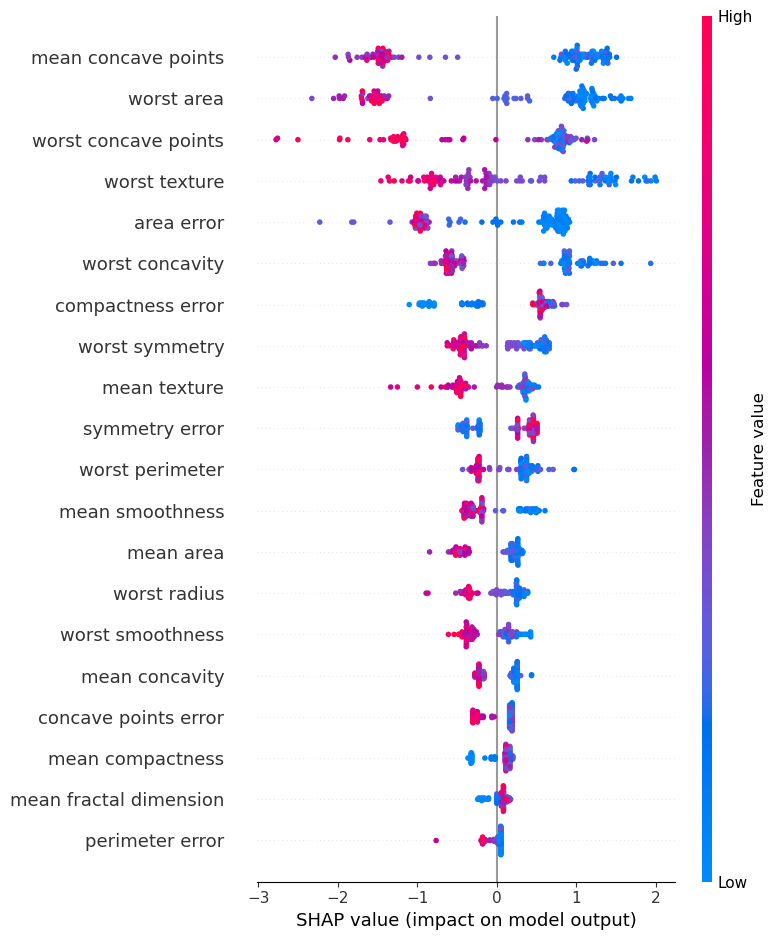

---

這是單筆數據的 SHAP 解釋圖，通常被稱為“力圖 (force plot)”。它顯示了該筆數據中的各個特徵如何影響模型的最終預測結果。以下是如何解讀這張圖的步驟：

### 1. 基本結構
- **水平軸（SHAP 值）**：水平軸從左到右表示 SHAP 值的累積和。左側代表負向影響，右側代表正向影響。
- **基線 (base value)**：圖的中心（標示為 `base value`）代表模型預測的基準值，即模型在沒有任何特徵影響時的平均輸出值。
- **預測值 (f(x))**：最右端的 `f(x)` 值代表模型對這筆數據的最終預測結果，在這張圖中是 `5.89`。

### 2. 顏色與方向
- **紅色和藍色的箭頭**：
  - **紅色箭頭**：代表對最終預測值的正向影響，這些特徵推動預測值向右（較高的值）偏移。
  - **藍色箭頭**：代表對最終預測值的負向影響，這些特徵推動預測值向左（較低的值）偏移。
- **箭頭的長度**：每個箭頭的長度反映了該特徵對最終預測值影響的大小。箭頭越長，該特徵對預測的影響越大。

### 3. 如何解釋各個特徵
- **紅色部分（正向影響）**：
  - `mean concave points = 0.03821`、`worst area = 677.9` 等紅色箭頭表示這些特徵值推動模型預測值變高。
  - 例如，`worst area = 677.9` 對預測的影響較大，因為它的箭頭較長，這表示該特徵使模型最終預測值增大。
- **藍色部分（負向影響）**：
  - `worst symmetry = 0.3014`、`worst concavity = 0.2671` 等藍色箭頭表示這些特徵使模型的最終預測值降低。
  - 例如，`worst symmetry = 0.3014` 的箭頭對預測有負向影響，並且箭頭相對較長，顯示這個特徵值使得最終預測值降低了。

### 4. 最終預測值的解釋
- **最終預測結果 (`f(x) = 5.89`)**：這個值是所有特徵影響加總之後的結果。在基線值 (`base value`) 的基礎上，紅色部分的正向影響推動預測值增加，而藍色部分的負向影響使得預測值減少，最終得到 `f(x) = 5.89`。

### 總結
- 這張圖展示了單筆數據中各個特徵對模型預測結果的貢獻。
- **紅色特徵**的箭頭越長，說明該特徵對提高預測結果的貢獻越大。
- **藍色特徵**的箭頭越長，說明該特徵對降低預測結果的貢獻越大。
- 最終預測值是基線值加上這些特徵的累計影響得到的。

---

`f(x)` 的值代表模型對該筆數據的最終預測結果，但這個值是否直接與陽性機率（例如二元分類中是否為某一類別的概率）相關，取決於模型的設計和輸出的定義。

在這裡，我們可以分幾種情況來理解 `f(x)`：

1. **回歸模型**：
   - 如果模型是一個回歸模型，那麼 `f(x)` 就是模型的預測值，可能是任何連續數值。在這種情況下，值的大小反映了目標變數的估計值，而不是陽性或陰性概率。

2. **二元分類模型**：
   - 如果模型是一個二元分類模型，並且輸出的是類別概率，那麼 `f(x)` 通常代表對某一類別的概率（比如陽性）。在這種情況下，`f(x)` 越高，表示該筆數據更可能屬於陽性類別。
   - 有時候，模型輸出的可能是 logits 值（如使用 sigmoid 函數之前的輸出），而不是概率。這種情況下，`f(x)` 值的高低雖然和預測結果有關，但需要經過激活函數才能得到最終的概率。

3. **多類分類模型**：
   - 如果模型是多類分類，那麼 `f(x)` 可能代表某一特定類別的分數或者概率。通常，這些值經過 softmax 函數後會轉化為各類別的概率。

在你提供的 SHAP 力圖中，`f(x) = 5.89` 代表了模型的最終輸出值，而這個值是否直接代表陽性概率，取決於你的模型是否是二元分類模型且輸出為概率。如果這個模型是預測分類結果，且 `f(x)` 代表某類別的分數或概率，那麼更高的 `f(x)` 可能意味著更高的陽性預測概率。

**結論**：
- **如果你的模型是二元分類，且 `f(x)` 代表正類別的概率，那麼 `f(x)` 值越高意味著陽性機率越高**。
- **如果模型是回歸模型或輸出 logits，那麼 `f(x)` 不一定代表陽性機率，而是模型的預測值或某個得分，需要進一步解釋**。

所以，要準確地回答是否 `f(x)` 越高就代表陽性機率越高，取決於你的模型具體是如何訓練以及設置的輸出。

---

In [9]:
# 解釋單筆數據
shap.initjs()   # 初始化 Javascript
shap.force_plot(shap_values[0].base_values, shap_values[0].values, X_test[0], feature_names=data.feature_names)  # 解釋第一筆數據

In [10]:
# 解釋單筆數據
shap.initjs()   # 初始化 Javascript
shap.force_plot(shap_values[0].base_values, shap_values[10].values, X_test[10], feature_names=data.feature_names)   # 解釋第十筆數據

In [11]:
# 解釋單筆數據
shap.initjs()   # 初始化 Javascript
shap.force_plot(shap_values[0].base_values, shap_values[15].values, X_test[15], feature_names=data.feature_names)   # 解釋第十五筆數據 